In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
#from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [ ]:
EPOCHS = 12
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'citrus'
width=256
height=256
depth=3


In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
            image = cv2.resize(image, (50,50))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
    

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:2000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing ctv_raw_resized ...
[INFO] Processing healthy_raw_resized ...
[INFO] Processing hwb_raw_resized ...
[INFO] Image loading completed


In [ ]:
image_size = len(image_list)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 
print(image_labels)


['ctv_raw_resized' 'healthy_raw_resized' 'hwb_raw_resized']
[INFO] Spliting data to train, test
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


2351 train samples
588 test samples
Label: [[1 0 0]]


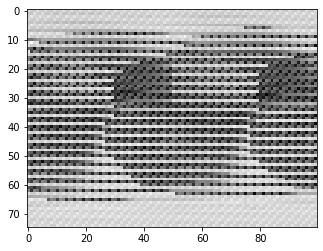

In [ ]:
#x_train = x_train.reshape(4915200, 64)
#x_test = x_test.reshape(4915200, 64)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#x_train /= 255
#x_test /= 255

#y_train = keras.utils.to_categorical(y_train, n_classes)
#y_test = keras.utils.to_categorical(y_test, n_classes)

print("Label:",y_train[255:256])
plt.imshow(x_train[255:256].reshape(75,100), cmap='gray')
plt.show()

In [ ]:
first_layer_size = 32
model = Sequential()
inputShape = (50, 50, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation("softmax"))

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

W1120 14:10:02.017832  5028 module_wrapper.py:137] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1120 14:10:02.386980  5028 module_wrapper.py:137] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              5185000   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3003      
Total para

Shape of First Layer (5, 5, 3, 32)
Visualization of First Layer


ValueError: cannot reshape array of size 480 into shape (32,9)

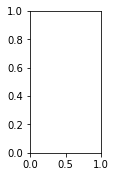

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(32,9),cmap='gray')
plt.show()

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(),metrics=["accuracy"])
# train the network
print("[INFO] training network...")



#history = model.fit_generator(
#    aug.flow(x_train, y_train, batch_size=BS),
#    validation_data=(x_test, y_test),
#    steps_per_epoch=len(x_train) // BS,
#    epochs=EPOCHS, verbose=1
#    )
history = model.fit(x_train,y_train,validation_split=0.25,
                    batch_size=BS,
                    epochs=EPOCHS,validation_data=(x_test, y_test),
                    verbose=1)

W1120 14:10:22.472360  5028 module_wrapper.py:137] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



[INFO] training network...


W1120 14:10:22.686372  5028 deprecation.py:323] From C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2351 samples, validate on 588 samples
Epoch 1/12
2351/2351 [==============================] - 11s 5ms/step - loss: 0.7377 - acc: 0.7218 - val_loss: 0.8153 - val_acc: 0.6905
Epoch 2/12
2351/2351 [==============================] - 10s 4ms/step - loss: 0.2923 - acc: 0.9085 - val_loss: 0.1408 - val_acc: 0.9575
Epoch 3/12
2351/2351 [==============================] - 10s 4ms/step - loss: 0.2135 - acc: 0.9387 - val_loss: 0.0699 - val_acc: 0.9762
Epoch 4/12
2351/2351 [==============================] - 10s 4ms/step - loss: 0.1154 - acc: 0.9609 - val_loss: 0.4996 - val_acc: 0.8622
Epoch 5/12
2351/2351 [==============================] - 11s 4ms/step - loss: 0.1739 - acc: 0.9541 - val_loss: 0.1051 - val_acc: 0.9711
Epoch 6/12
2351/2351 [==============================] - 10s 4ms/step - loss: 0.0826 - acc: 0.9736 - val_loss: 0.0403 - val_acc: 0.9881
Epoch 7/12
2351/2351 [==============================] - 10s 4ms/step - loss: 0.0818 - acc: 0.9792 - val_loss: 0.0877 - val_acc: 0.9660
Epoch 8/

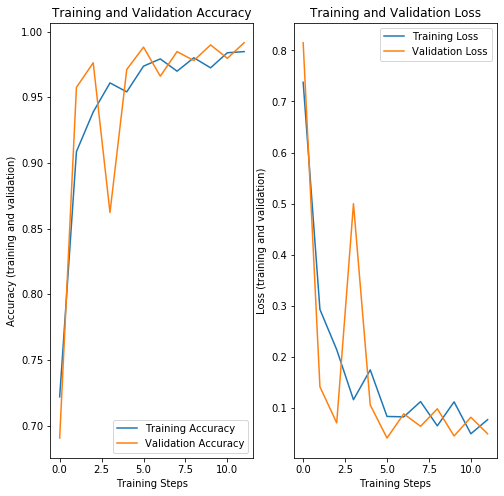

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('citrus_graph.png',dpi=400)
plt.show()




In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Shape of First Layer (5, 5, 3, 32)
Visualization of First Layer


ValueError: cannot reshape array of size 480 into shape (32,9)

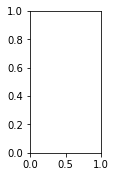

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer3 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer3[:,i-1].reshape(32,9),cmap='gray')
plt.show()



In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
588/588 [==============================] - 0s 768us/step
Test Accuracy: 99.14965986394559


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04861512763781487
Test accuracy: 0.9914965986394558


In [ ]:
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [1.03998726e-13 1.23173009e-30 1.00000000e+00]

Thresholded output
 [0 0 1]


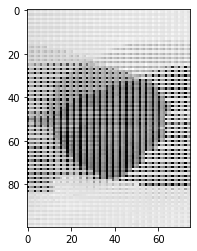

In [ ]:
plt.imshow(x_test[23:24].reshape(100,75),cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "blue")
    fig.tight_layout()
    return ax

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
prediction = model.predict(x_test, batch_size=10, verbose=0)
rounded_prediction = model.predict_classes(x_test, batch_size=10, verbose=0)
#y_pred=np.argmax(y_pred, axis=1)

In [ ]:
for i in rounded_prediction:
    print(i)

2
0
2
0
1
0
2
1
1
2
0
0
2
2
2
1
2
0
0
1
2
1
1
2
0
0
2
0
2
1
1
0
0
2
1
2
2
2
2
1
2
2
1
0
2
0
2
1
0
0
1
2
1
2
2
2
2
1
2
0
2
2
1
0
1
2
0
0
0
2
0
0
1
0
2
2
2
0
0
2
1
1
1
1
0
1
2
2
1
1
2
2
2
1
0
0
1
0
1
1
2
0
0
1
2
0
2
0
1
2
0
2
1
1
2
0
2
2
1
2
1
2
2
1
2
0
1
1
1
1
0
0
1
1
2
1
0
0
2
0
1
2
1
2
0
1
1
1
1
0
2
0
2
1
2
0
0
2
0
1
2
0
1
1
1
2
1
2
0
2
1
1
0
1
1
2
0
2
2
0
0
2
0
1
0
1
0
0
0
0
2
1
2
0
0
0
1
1
0
0
0
2
1
0
1
1
1
2
1
1
0
0
0
2
2
2
1
0
1
2
0
0
2
0
0
2
0
2
0
1
0
1
1
0
1
1
0
1
1
1
0
1
2
2
0
0
1
1
0
2
2
0
1
1
0
0
0
0
0
2
1
0
0
2
2
0
1
0
2
1
1
1
1
2
0
1
2
1
1
2
2
0
1
2
0
0
1
2
1
2
2
1
1
0
2
2
0
1
1
0
2
0
2
1
1
0
2
2
1
1
1
0
1
2
2
2
0
2
1
2
2
0
0
1
1
0
2
2
2
0
1
0
0
1
0
2
0
0
2
0
1
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
2
2
2
0
1
0
2
2
0
1
1
0
0
0
0
0
0
0
2
0
0
1
2
2
0
1
1
1
1
2
0
2
2
2
1
2
1
0
1
1
2
2
1
1
0
2
1
2
1
0
0
0
1
1
1
2
2
0
2
1
1
2
1
2
2
1
0
0
2
2
0
0
0
0
1
2
0
2
2
1
2
1
2
2
2
0
2
0
0
0
2
2
0
0
0
0
2
0
0
2
1
1
0
2
0
0
2
2
0
0
2
2
0
1
2
1
0
1
1
2
1
1
2
2
2
1
1
0
1
2
0
2
0
2
2
0
0
1
1
2
2
1
0
2


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

# Y_pred = model.predict(x_test)
# print(Y_pred)
# y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
 
#                        (or)

y_pred = model.predict_classes(x_test)
print(y_pred)

p=model.predict_proba(x_test) # to predict probability

# target_names = ['class 0(BIKES)', 'class 1(CARS)', 'class 2(HORSES)']
print(label_binarizer.classes_)
target_names = label_binarizer.classes_
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


[2 0 2 0 1 0 2 1 1 2 0 0 2 2 2 1 2 0 0 1 2 1 1 2 0 0 2 0 2 1 1 0 0 2 1 2 2
 2 2 1 2 2 1 0 2 0 2 1 0 0 1 2 1 2 2 2 2 1 2 0 2 2 1 0 1 2 0 0 0 2 0 0 1 0
 2 2 2 0 0 2 1 1 1 1 0 1 2 2 1 1 2 2 2 1 0 0 1 0 1 1 2 0 0 1 2 0 2 0 1 2 0
 2 1 1 2 0 2 2 1 2 1 2 2 1 2 0 1 1 1 1 0 0 1 1 2 1 0 0 2 0 1 2 1 2 0 1 1 1
 1 0 2 0 2 1 2 0 0 2 0 1 2 0 1 1 1 2 1 2 0 2 1 1 0 1 1 2 0 2 2 0 0 2 0 1 0
 1 0 0 0 0 2 1 2 0 0 0 1 1 0 0 0 2 1 0 1 1 1 2 1 1 0 0 0 2 2 2 1 0 1 2 0 0
 2 0 0 2 0 2 0 1 0 1 1 0 1 1 0 1 1 1 0 1 2 2 0 0 1 1 0 2 2 0 1 1 0 0 0 0 0
 2 1 0 0 2 2 0 1 0 2 1 1 1 1 2 0 1 2 1 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 2 2
 0 1 1 0 2 0 2 1 1 0 2 2 1 1 1 0 1 2 2 2 0 2 1 2 2 0 0 1 1 0 2 2 2 0 1 0 0
 1 0 2 0 0 2 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 2 2 2 0 1 0 2 2 0 1 1 0 0 0
 0 0 0 0 2 0 0 1 2 2 0 1 1 1 1 2 0 2 2 2 1 2 1 0 1 1 2 2 1 1 0 2 1 2 1 0 0
 0 1 1 1 2 2 0 2 1 1 2 1 2 2 1 0 0 2 2 0 0 0 0 1 2 0 2 2 1 2 1 2 2 2 0 2 0
 0 0 2 2 0 0 0 0 2 0 0 2 1 1 0 2 0 0 2 2 0 0 2 2 0 1 2 1 0 1 1 2 1 1 2 2 2
 1 1 0 1 2 0 2 0 2 2 0 0 

Normalized confusion matrix
[[0.98 0.02 0.  ]
 [0.01 0.99 0.  ]
 [0.   0.   1.  ]]


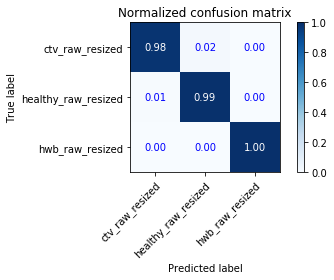

In [ ]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_, normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[204   4   0]
 [  1 181   0]
 [  0   0 198]]


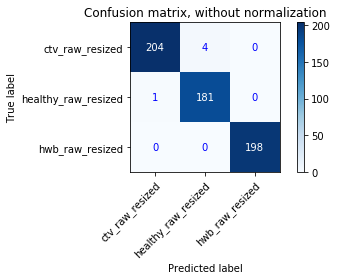

In [ ]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_,
                      title='Confusion matrix, without normalization')
